In [1]:
import sys
from pathlib import Path

module_path = str(Path().resolve().parent / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from curvature.tvg import *
from curvature.visualization import *
from soap_parser.matrix import *
from soap_parser.visualization import draw_reeb_graph

import soap_parser.report_parser as rp
import networkx as nx

from IPython.display import Image 

# TODO : fix random seed
K = 1

### Scenario A : Data Mule

/home/nabu/.local/share/mamba/envs/soap/lib/python3.11/site-packages/ot/lp/__init__.py:580: UserWarning: Problem infeasible. Check that a and b are in the simplex
  check_result(result_code)



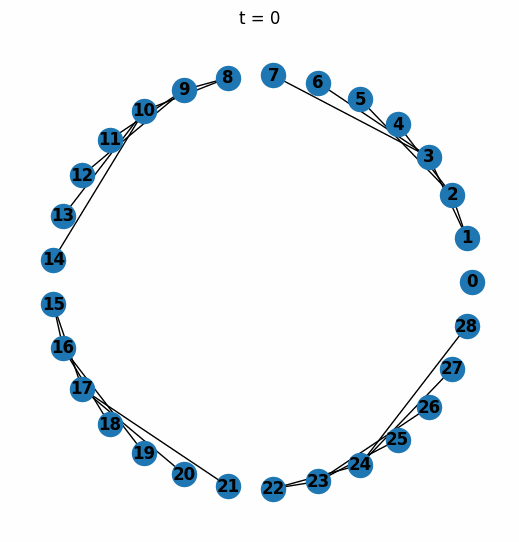

Network A has 29 nodes.


In [2]:
scenario_a = "Data Mule"

edges_a = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (8, 9), (8, 10),
(9, 11), (9, 12), (10, 13), (10, 14), (15, 16), (15, 17), (16, 18), (16, 19),
(17, 20), (17, 21), (22, 23), (22, 24), (23, 25), (23, 26), (24, 27), (24, 28)]
edges_b = edges_a + [(0, 1), (0, 8)]
edges_c = edges_a + [(0, 15), (0, 22)]

a_list = 2 * [edges_a] + 2 * [edges_b] + 2 * [edges_a] + 2 * [edges_c]

matrix_a = IntervalMatrix(29, 29, labels = [str(k) for k in range(29)])
start = 0
for e in 10 * a_list:
    for i, j in e:
        matrix_a[i, j] |= P.closed(start, start + 1)
    start += 1
network_a = TemporalNetwork(matrix_a)

r_a = 1
sample_times_a = np.arange(0, 80, r_a).tolist()
distance_matrices_a = network_a.calculate_distances(r = r_a)
curvature_matrices_a = calculate_curvature_matrices(
    distance_matrices = distance_matrices_a,
    kernels = radius_1_uniform_kernel(network_a, sample_times_a),
    K = K,
    r = r_a
)
# print(f"A : critical times = {network_a.get_critical_times()}")

# rg_a = network_a.get_reeb_graph()
# draw_reeb_graph(rg_a)
save_tvg(network_a, f"{scenario_a}.gif", sample_times = sample_times_a)
display(show_gif(f"{scenario_a}.gif"))

# print(f"{[network_a.get_node_label(k) for k in network_a.graph.nodes()]}")
print(f"Network A has {len(network_a.graph.nodes())} nodes.")

### Scenario B : Starlink


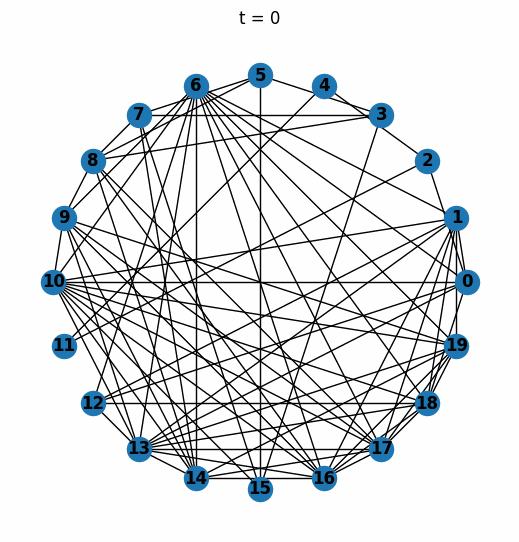

Network B has 20 nodes.


In [3]:
scenario_b = "Starlink [20 Satellites]"

filepath = "./scenario_b.csv"
nodes, edges = rp.contact_analysis_report_parser(filepath)
nodes, edges = rp.filter_contact_plan(nodes, edges, substring_exclusion_list=["Mars", "Moon", "[DTC]"])

matrix_b = rp.contact_plan_to_matrix(nodes, edges)
matrix_b = matrix_b.get_submatrix(list(range(20)), list(range(20)))
network_b = TemporalNetwork(matrix_b)

r_b = 1080
sample_times_b = np.arange(0, 86_400, r_b).tolist()
distance_matrices_b = network_b.calculate_distances(r = r_b)
curvature_matrices_b = calculate_curvature_matrices(
    distance_matrices = distance_matrices_b,
    kernels = radius_1_uniform_kernel(network_b, sample_times_b),
    K = K,
    r = r_b
)

save_tvg(network_b, f"{scenario_b}.gif", sample_times = sample_times_b)
display(show_gif(f"{scenario_b}.gif"))


# rg_b = network_b.get_reeb_graph()
# draw_reeb_graph(rg_b)

# print(f"{[network_b.get_node_label(k) for k in network_b.graph.nodes()]}")
print(f"Network B has {len(network_b.graph.nodes())} nodes.")

### Scenario C : LunaNet


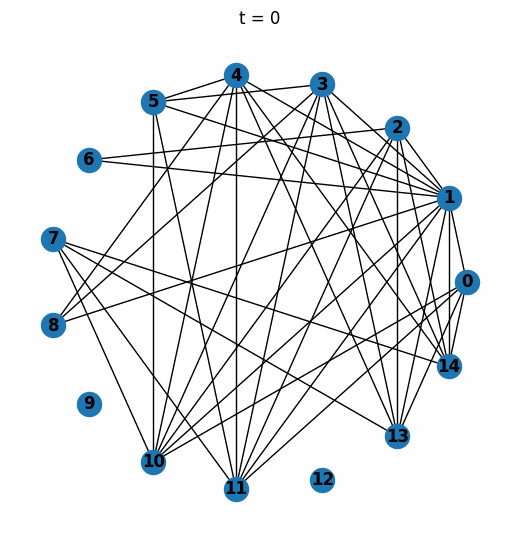

Network C has 15 nodes.


In [4]:
scenario_c = "LunaNet"

filepath = "./scenario_c.csv"
nodes, edges = rp.contact_analysis_report_parser(filepath)
nodes, edges = rp.filter_contact_plan(nodes, edges)

matrix_c = rp.contact_plan_to_matrix(nodes, edges)
network_c = TemporalNetwork(matrix_c)
# print(network_c)

r_c = 1080
sample_times_c = np.arange(0, 86_400, r_c).tolist()
distance_matrices_c = network_c.calculate_distances(r = r_c)
curvature_matrices_c = calculate_curvature_matrices(
    distance_matrices = distance_matrices_c,
    kernels = radius_1_uniform_kernel(network_c, sample_times_c),
    K = K,
    r = r_c
)

save_tvg(network_c, f"{scenario_c}.gif", sample_times = sample_times_c)
display(show_gif(f"{scenario_c}.gif"))


# rg_c = network_c.get_reeb_graph()
# draw_reeb_graph(rg_c)

# print(f"{[network_c.get_node_label(k) for k in network_c.graph.nodes()]}")
print(f"Network C has {len(network_c.graph.nodes())} nodes.")

### True Reeb Graphs

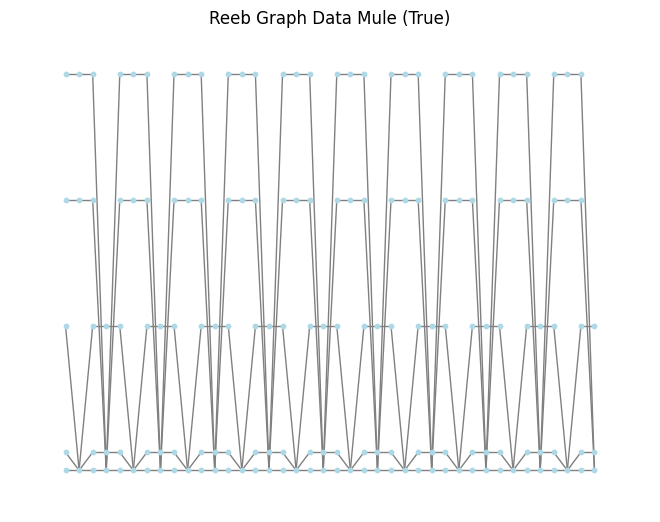

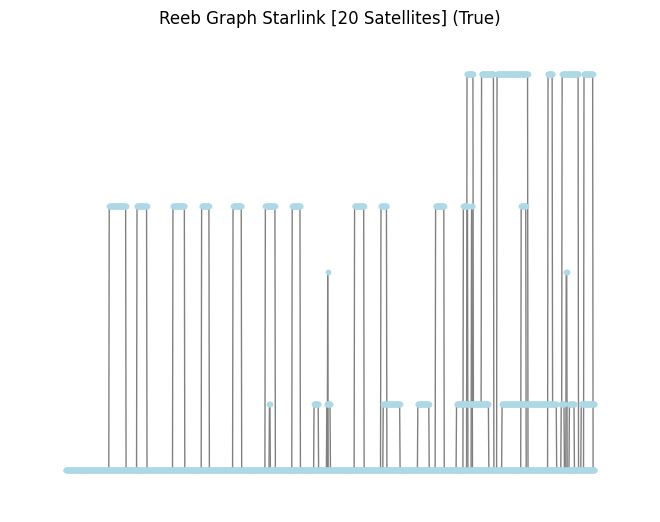

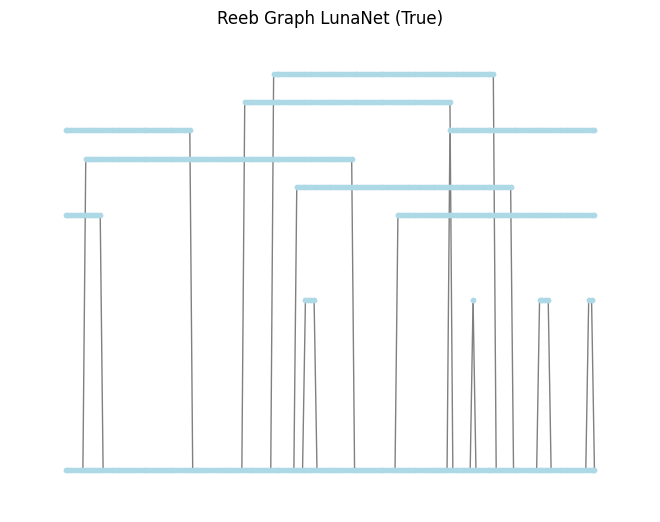

In [12]:
rg_a = network_a.get_reeb_graph()
display(draw_reeb_graph(rg_a, title = f"{scenario_a} (True)"))

rg_b = network_b.get_reeb_graph()
display(draw_reeb_graph(rg_b, title = f"{scenario_b} (True)"))

rg_c = network_c.get_reeb_graph()
display(draw_reeb_graph(rg_c, title = f"{scenario_c} (True)"))

### Evenly Sampled Reeb Graphs

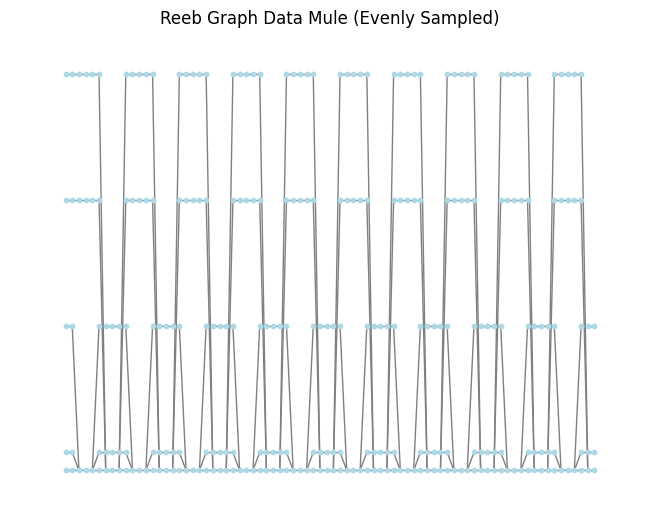

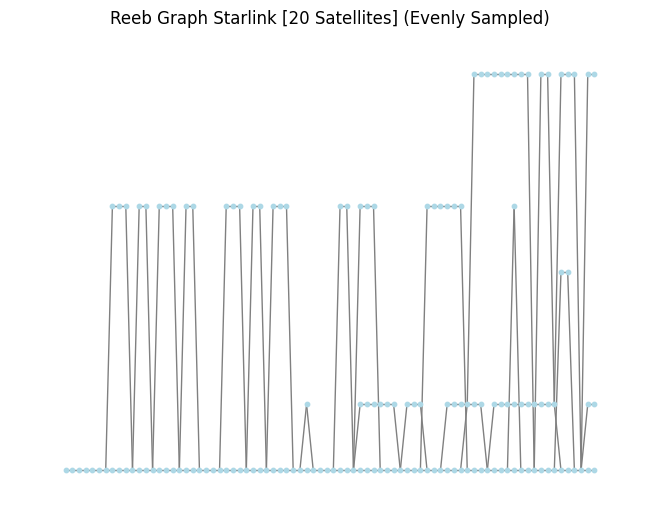

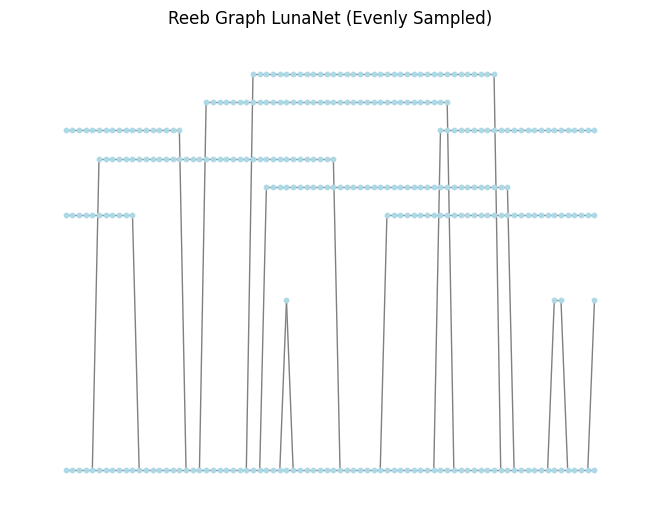

In [13]:
# scenario a : r = 1

rg_a = network_a.get_reeb_graph(sample_times_a)
display(draw_reeb_graph(rg_a, title = f"{scenario_a} (Evenly Sampled)"))

# scenario's b and c : r = 1080

rg_b = network_b.get_reeb_graph(sample_times = sample_times_b)
display(draw_reeb_graph(rg_b, title = f"{scenario_b} (Evenly Sampled)"))

rg_c = network_c.get_reeb_graph(sample_times = sample_times_c)
display(draw_reeb_graph(rg_c, title = f"{scenario_c} (Evenly Sampled)"))


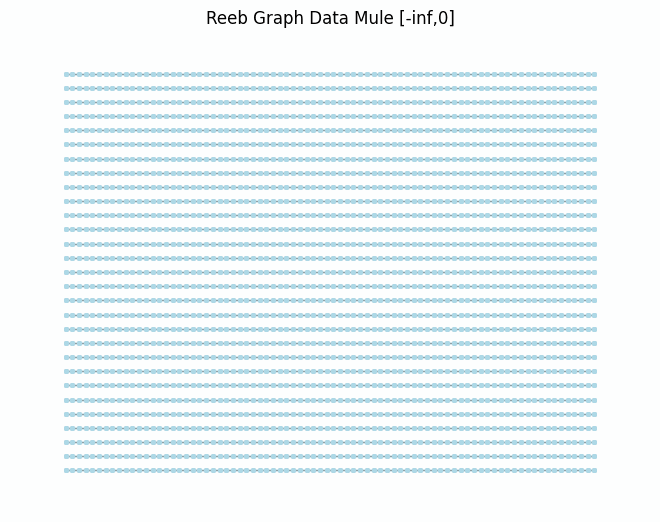


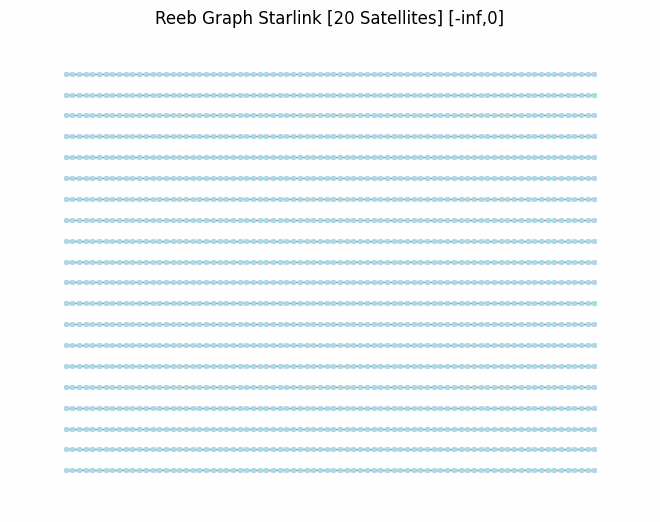


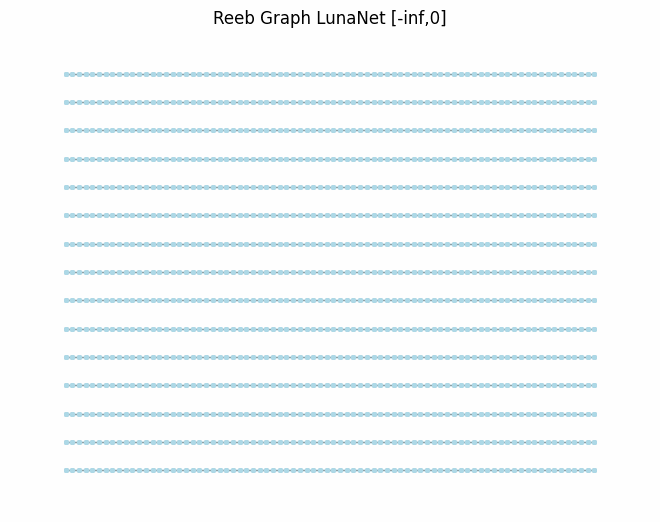


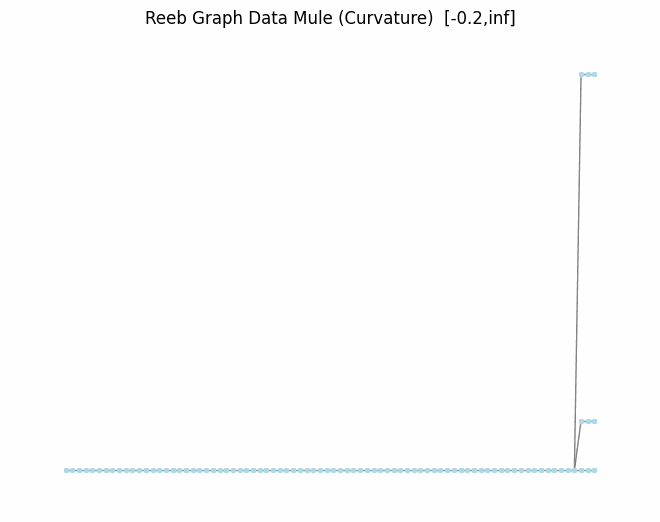


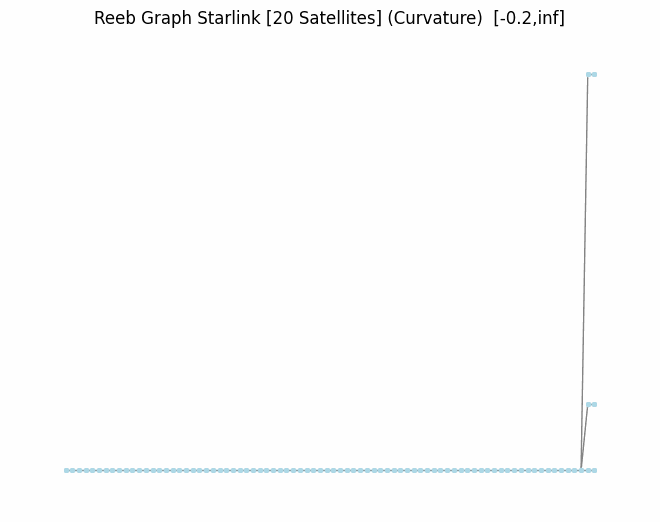


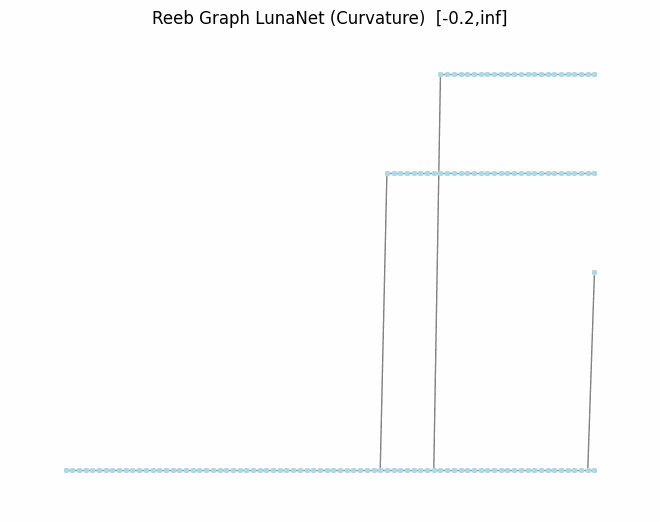

In [14]:

def filter_network(network, sample_times, distance_matrices, c_list_low, c_list_high, scenario):
    assert len(c_list_low) == len(c_list_high)

    start, end = sample_times[0], sample_times[-1]

    distance = lambda t, u, v: distance_matrices[index(sample_times, t)][u][v]
    network_filtered = [network.bandpass_filter(
        sample_times,
        distance,
        threshold_low = cl,
        threshold_high = ch
    ) for cl, ch in zip(c_list_low, c_list_high)]

    images = [draw_reeb_graph(n.get_reeb_graph(sample_times = sample_times, start = start, end = end),
        title = f"{scenario} [{c_list_low[i]},{c_list_high[i]}]")
            for i, n in enumerate(network_filtered)]
    save_gif(f"./{scenario}_reeb_graph_filtration.gif", images)
    display(show_gif(f"{scenario}_reeb_graph_filtration.gif"))

    return network_filtered

# temporal distance filtration
c_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
network_a_filtered_temporal = filter_network(network_a, sample_times_a, distance_matrices_a, [-INF for c in c_list], c_list, scenario_a)

c_list = [c * 1000 for c in range(11)] # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
network_b_filtered_temporal = filter_network(network_b, sample_times_b, distance_matrices_b, [-INF for c in c_list], c_list, scenario_b)
network_c_filtered_temporal = filter_network(network_c, sample_times_c, distance_matrices_c, [-INF for c in c_list], c_list, scenario_c)

# curvature filtration
c_list = [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# c_list = [1, 0.8, 0.6, 0.4, 0.2, 0. -0.1]
network_a_filtered_curvature = filter_network(network_a, sample_times_a, curvature_matrices_a, c_list, [INF for c in c_list], scenario_a + " (Curvature) ")

network_b_filtered_curvature = filter_network(network_b, sample_times_b, curvature_matrices_b, c_list, [INF for c in c_list], scenario_b + " (Curvature) ")
network_c_filtered_curvature = filter_network(network_c, sample_times_c, curvature_matrices_c, c_list, [INF for c in c_list], scenario_c + " (Curvature) ")

# temporal_distance_a = lambda t, u, v: distance_matrices_a[index(sample_times_a, t)][u][v]
# network_a_filtered = [network_a.bandpass_filter(
#     sample_times_a,
#     temporal_distance_a,
#     threshold_high = c
# ) for c in c_list]
# images = [draw_reeb_graph(network.get_reeb_graph(sample_times = sample_times_a, start = 0, end = 80)) for network in network_a_filtered]
# save_gif(f"./network_a_reeb_graph_filtration.gif", images)
# display(show_gif(f"network_a_reeb_graph_filtration.gif"))


### Signatures : Toy Example

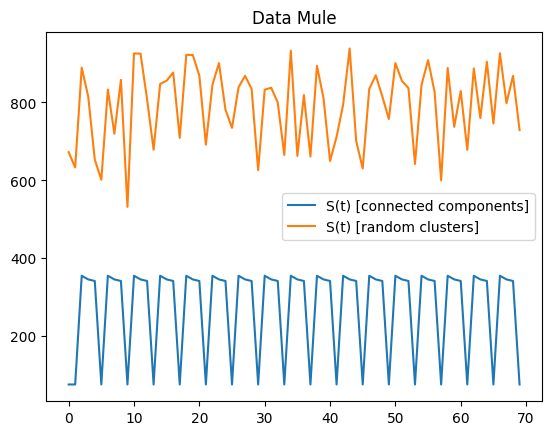

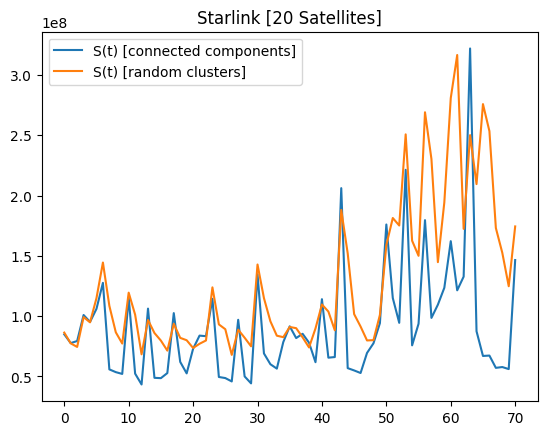

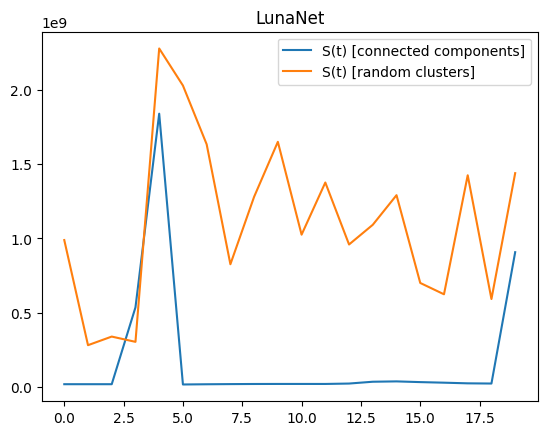

In [8]:
def plot_signatures(network, sample_times, r: float = 1, title = None) -> None:
    distance_matrices = network.calculate_distances(r = r, truncate = True)
    sample_times = sample_times[:len(distance_matrices)]
    signatures_cc = calculate_signatures(
        distance_matrices,
        build_clusters(network, sample_times)
    )
    signatures_rc = calculate_signatures(
        distance_matrices,
        build_clusters(network, sample_times, randomize = True)
    )

    # for i, s in enumerate(signatures_cc):
    #     print(f"{i} : {len(str(int(s)))} {s = }")

    if title is not None:
        plt.title(title)
    plt.plot(signatures_cc, label="S(t) [connected components]")
    plt.plot(signatures_rc, label="S(t) [random clusters]")
    plt.legend()
    plt.show()
    return None

# scenario a
plot_signatures(network_a, sample_times_a, r = r_a, title = scenario_a)

# scenario b
plot_signatures(network_b, sample_times_b, r = r_b, title = scenario_b)

# scenario c
plot_signatures(network_c, sample_times_c, r = r_c, title = scenario_c)

### Filtered Signatures

Signatures with edges with curvature >= 0.2 removed


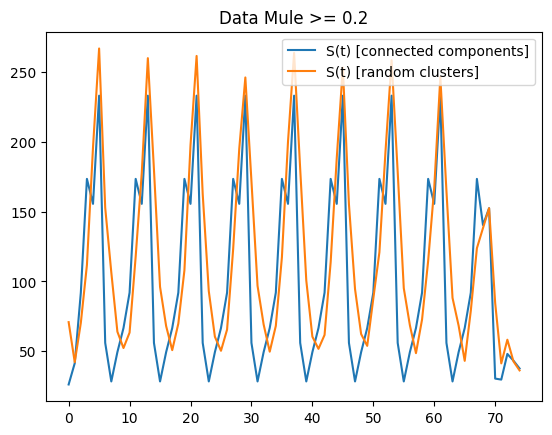

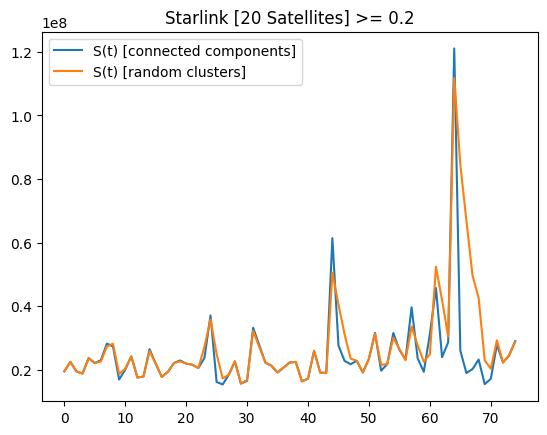

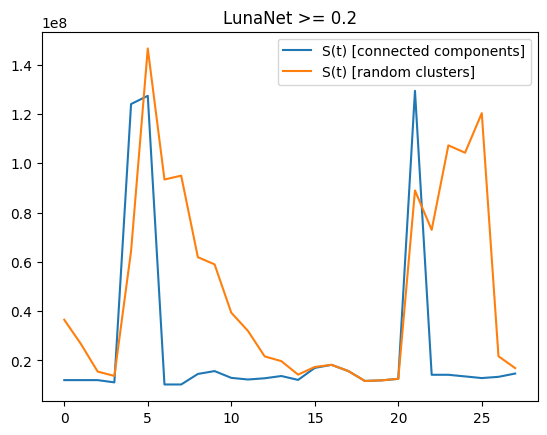

In [27]:
k = 4
print(f"Signatures with edges with curvature >= {c_list[k]} removed")

# scenario a
plot_signatures(network_a_filtered_curvature[k], sample_times_a, r = r_a, title = f"{scenario_a} >= {c_list[k]}")

# scenario b
plot_signatures(network_b_filtered_curvature[k], sample_times_b, r = r_b, title = f"{scenario_b} >= {c_list[k]}")

# scenario c
plot_signatures(network_c_filtered_curvature[k], sample_times_c, r = r_c, title = f"{scenario_c} >= {c_list[k]}")


### Summary Graphs

Truncation T = 70 / 80


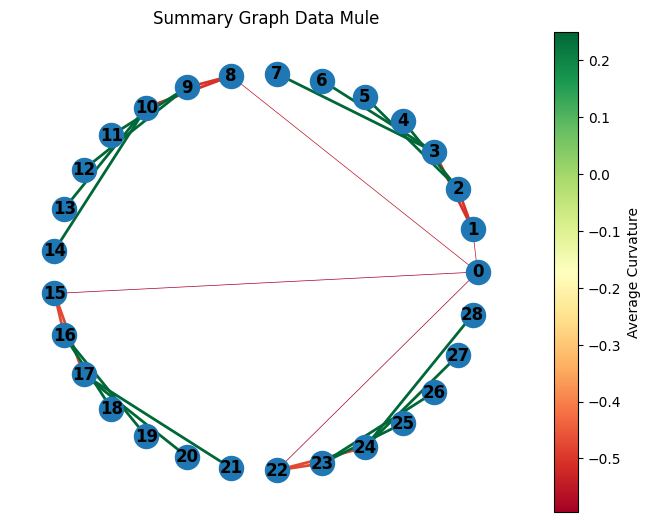

0:0
1:1
2:2
3:3
4:4
5:5
6:6
7:7
8:8
9:9
10:10
11:11
12:12
13:13
14:14
15:15
16:16
17:17
18:18
19:19
20:20
21:21
22:22
23:23
24:24
25:25
26:26
27:27
28:28
Truncation T = 71 / 80


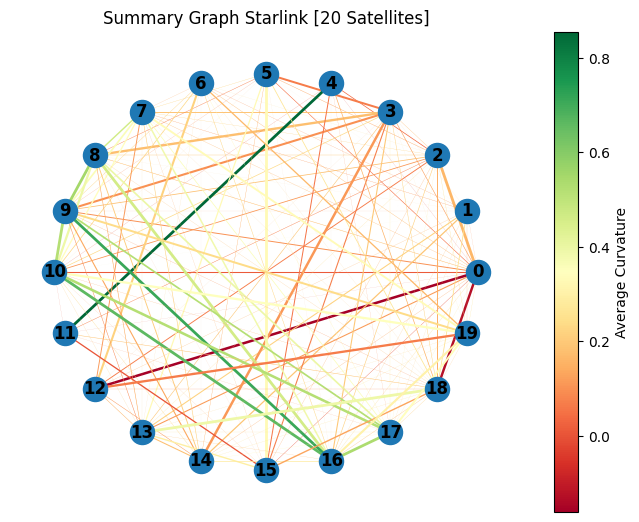

0:STARLINK-30858
1:STARLINK-30833
2:STARLINK-4206
3:STARLINK-31701
4:STARLINK-5012
5:STARLINK-3149
6:STARLINK-30700
7:STARLINK-31584
8:STARLINK-3342
9:STARLINK-5372
10:STARLINK-2651
11:STARLINK-1887
12:STARLINK-5952
13:STARLINK-5033
14:STARLINK-3982
15:STARLINK-30210
16:STARLINK-1730
17:STARLINK-4378
18:STARLINK-5642
19:STARLINK-3341
Truncation T = 20 / 80


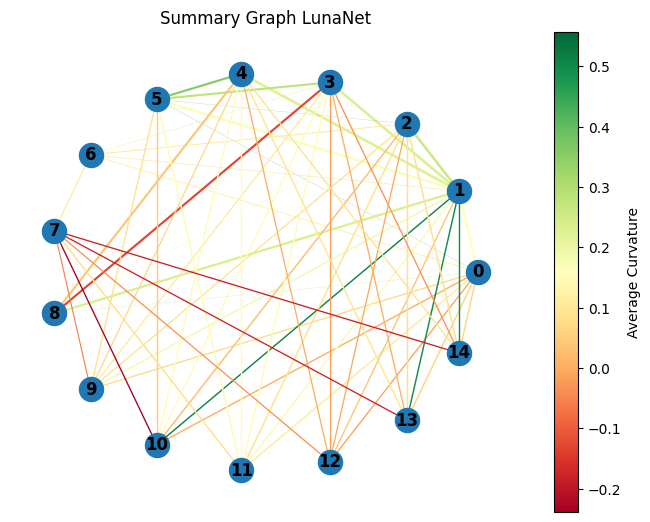

0:IOAGNorth1
1:Gateway
2:IOAGNorth2
3:IOAGSouth1
4:IOAGSouth2
5:LunarBase
6:LunarRoverFar
7:IOAGEquatorial
8:LunarRoverNear
9:DSN:Canberra
10:DSN:Goldstone
11:DSN:Madrid
12:LEGS:Dongara
13:LEGS:Wallops
14:LEGS:WhiteSands


In [9]:
# network_a.get_summary_graph()
K = 1

sg_a = draw_summary_graph(network_a, title = scenario_a, K = K, r = r_a)
display(sg_a)
print(f"{network_a:n}")

sg_b = draw_summary_graph(network_b, title = scenario_b, K = K, r = r_b)
display(sg_b)
print(f"{network_b:n}")

sg_c = draw_summary_graph(network_c, title = scenario_c, K = K, r = r_c)
display(sg_c)
print(f"{network_c:n}")



### Bottleneck Analysis

### Constant Cycle / Complete Graph Temporal Networks

/home/nabu/.local/share/mamba/envs/soap/lib/python3.11/site-packages/ot/lp/__init__.py:580: UserWarning: Problem infeasible. Check that a and b are in the simplex
  check_result(result_code)


Truncation T = 14 / 20


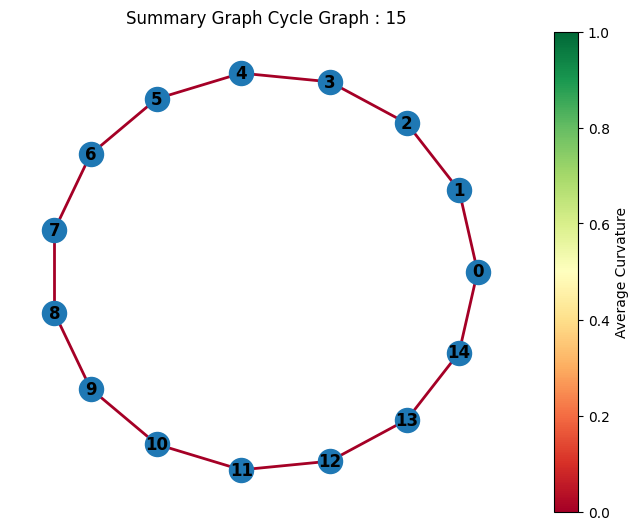

Truncation T = 20 / 20


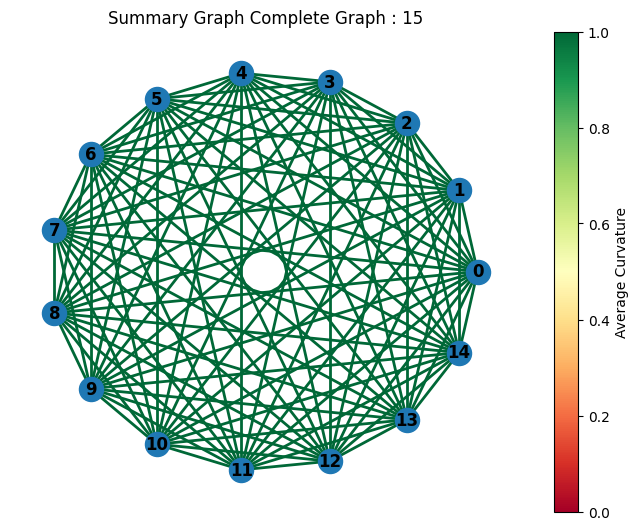

In [10]:
start, end = 0, 20

r_cg = 1
network_cg = build_cycle_tvg(n := 15, start = start, end = end)
distance_matrices_cg = network_cg.calculate_distances(r = r_cg)
sample_times_cg = np.arange(start, end, r_cg).tolist()
curvature_matrices_cg = calculate_curvature_matrices(
    distance_matrices = distance_matrices_cg,
    kernels = radius_1_uniform_kernel(network_cg, sample_times_cg),
    K = K,
    r = r_cg
)
sg_cg = draw_summary_graph(network_cg, title = f"Cycle Graph : {n}")
display(sg_cg)

r_kg = 1
network_kg = build_complete_tvg(n := 15, start = start, end = end)
distance_matrices_kg = network_kg.calculate_distances(r = r_kg)
sample_times_kg = np.arange(start, end, r_kg).tolist()
curvature_matrices_kg = calculate_curvature_matrices(
    distance_matrices = distance_matrices_kg,
    kernels = radius_1_uniform_kernel(network_kg, sample_times_kg),
    K = K,
    r = r_kg
)
sg_kg = draw_summary_graph(network_kg, title = f"Complete Graph : {n}")
display(sg_kg)


First `inf`/`nan` found at 14 / 20


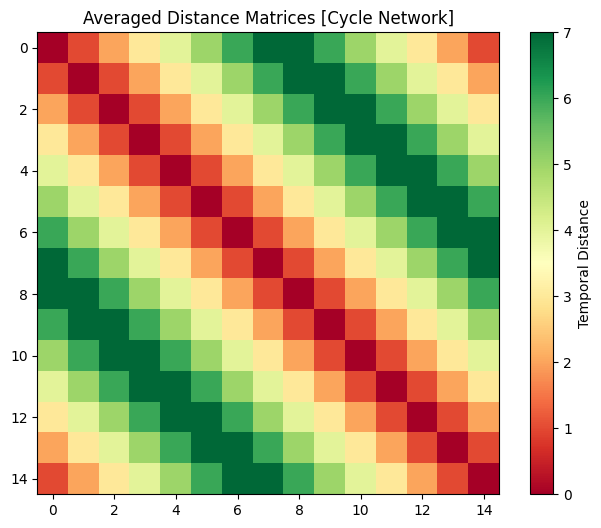

First `inf`/`nan` found at 14 / 20


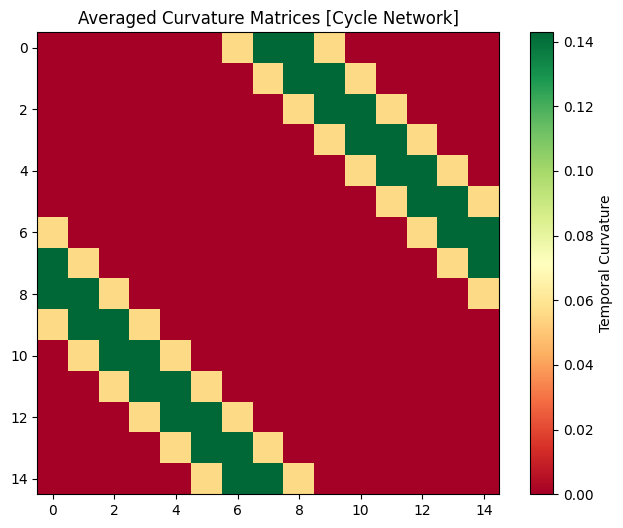

First `inf`/`nan` found at 19 / 20


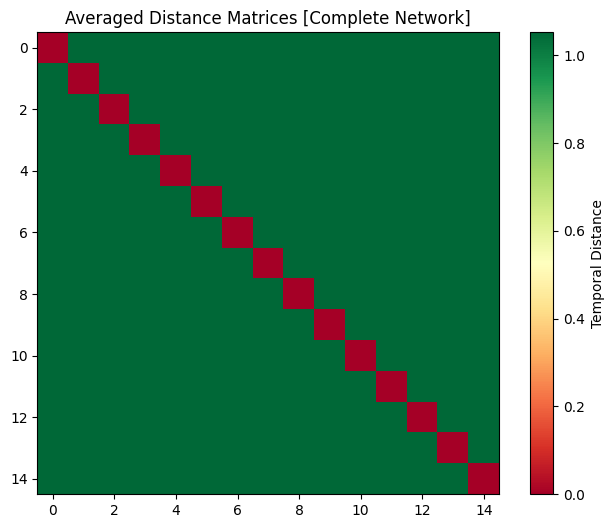

First `inf`/`nan` found at 19 / 20


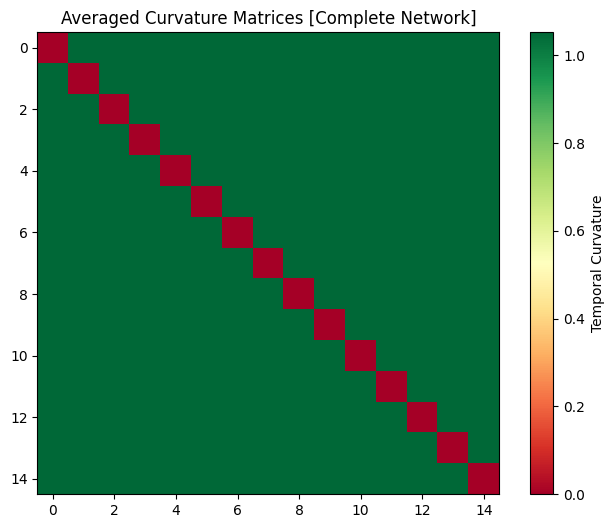

First `inf`/`nan` found at 70 / 80


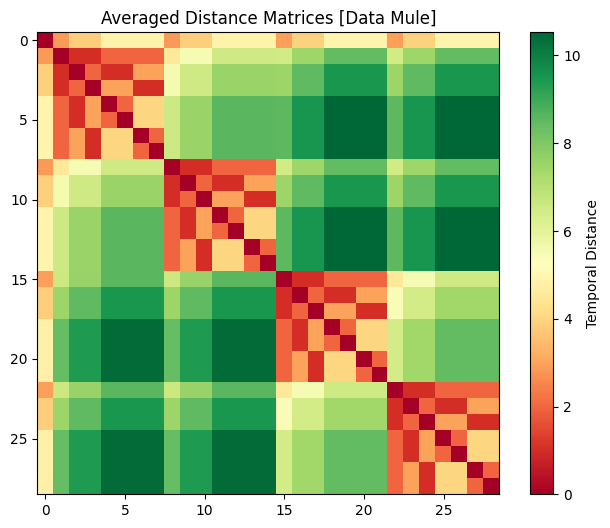

First `inf`/`nan` found at 70 / 80


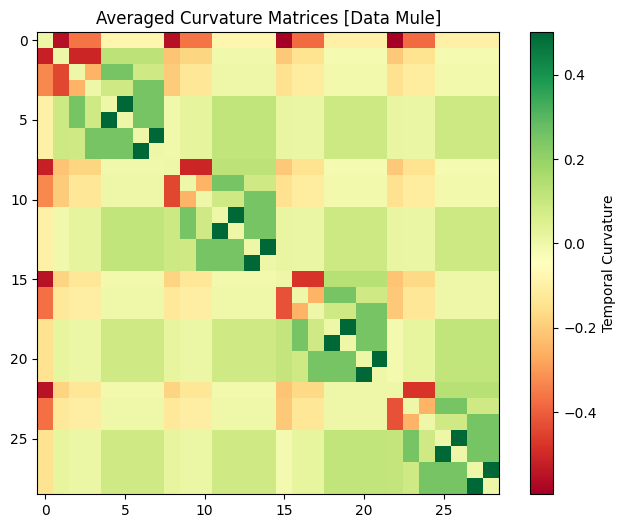

First `inf`/`nan` found at 71 / 80


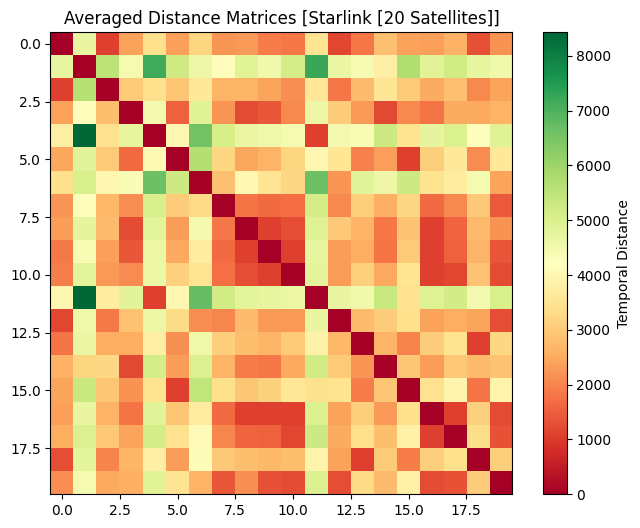

First `inf`/`nan` found at 71 / 80


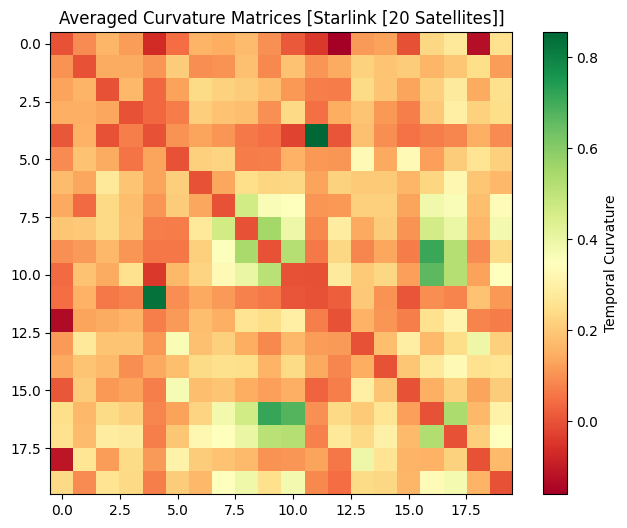

First `inf`/`nan` found at 20 / 80


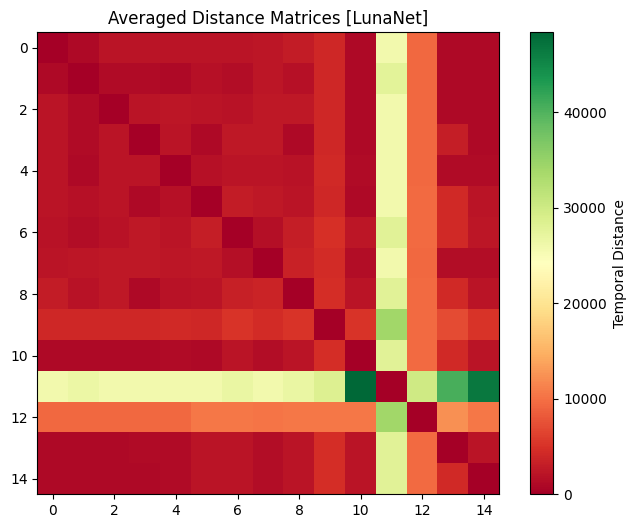

First `inf`/`nan` found at 20 / 80


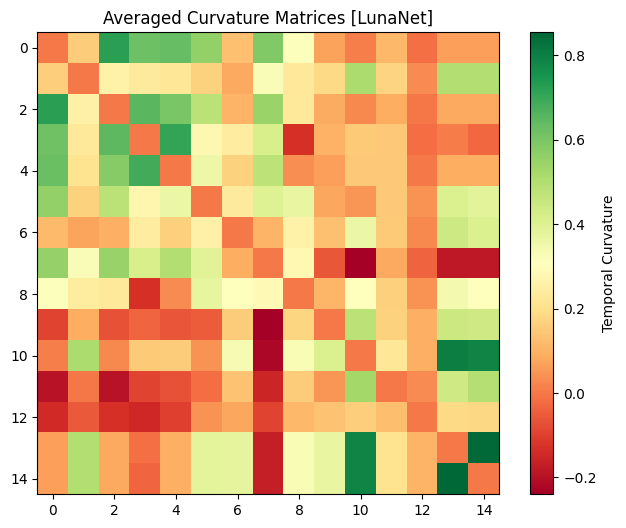

In [11]:
def plot_heatmaps(
    distance_matrices,
    title_label = None,
    colorbar_label = None,
) -> None:

    matrix = calculate_averaged_distances(distance_matrices)

    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap = 'RdYlGn', interpolation = 'nearest')
    # plt.colorbar(label='Difference in Distances')
    if colorbar_label is not None:
        plt.colorbar(label = colorbar_label)
    else:
        plt.colorbar()
    # plt.title('Difference of Original vs. Curvature Low Pass Filter')
    # plt.xlabel('Column Index')
    # plt.ylabel('Row Index')
    if title_label is not None:
        plt.title(label = title_label)
    plt.show()

    return None

plot_averaged_tdm = lambda dms, label: plot_heatmaps(
    dms,
    title_label = f"Averaged Distance Matrices [{label}]",
    colorbar_label = "Temporal Distance"
)
plot_averaged_tcm = lambda dcs, label: plot_heatmaps(
    dcs,
    title_label = f"Averaged Curvature Matrices [{label}]",
    colorbar_label = "Temporal Curvature"
)

# cycle graph
# distance_matrices_cg = network_cg.calculate_distances(r = 1)
plot_averaged_tdm(distance_matrices_cg, "Cycle Network")
plot_averaged_tcm(curvature_matrices_cg, "Cycle Network")
# complete graph
# distance_matrices_kg = network_kg.calculate_distances(r = 1)
plot_averaged_tdm(distance_matrices_kg, "Complete Network")
plot_averaged_tcm(curvature_matrices_kg, "Complete Network")

# scenario a
# distance_matrices_a = network_a.calculate_distances(r = 1)
plot_averaged_tdm(distance_matrices_a, scenario_a)
plot_averaged_tcm(curvature_matrices_a, scenario_a)

# scenario b
# distance_matrices_b = network_b.calculate_distances(r = 1080)
plot_averaged_tdm(distance_matrices_b, scenario_b)
plot_averaged_tcm(curvature_matrices_b, scenario_b)

# scenario c
# distance_matrices_c = network_c.calculate_distances(r = 1080)
plot_averaged_tdm(distance_matrices_c, scenario_c)
plot_averaged_tcm(curvature_matrices_c, scenario_c)

# for i, m in enumerate(curvature_matrices_c):
#     print(f"{i} : {m[14][9] = }")
